# Neutron yield per W versus beam power

## Figure 11 from thermal analysis paper

- Path to original figure script: /Users/hkromer/02_PhD/04_Publiations/01_PaperDrafts/2018/01_RotatingTarget/Figures/Figure_11_act_nsW_vs_beam_power_noLeakageCurrent/Figure_11_act_nsW_vs_beam_power_noLeakageCurrent.py

- Path to the datafile: /Users/hkromer/polybox/Thesis/Figures/03.RotatingTarget/neutron_yield_vs_beam_power/data/df.csv

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.ticker import AutoMinorLocator
import glob
import re
import copy

In [2]:
os.environ["PATH"] += os.pathsep + '/usr/local/texlive/2018/bin/x86_64-darwin'
plt.rc('text', usetex=True)
plt.rc('font', weight='bold')
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.rm'] = 'Arial'
matplotlib.rcParams['mathtext.it'] = 'Arial:italic'
matplotlib.rcParams['mathtext.bf'] = 'Arial:bold'
matplotlib.rcParams['mathtext.tt'] = 'Arial'
matplotlib.rcParams['mathtext.cal'] = 'Arial'
matplotlib.rcParams['text.latex.preamble'] = [r'\usepackage{sfmath} \boldmath']

In [3]:
# datafile from COMSOL
path_to_data = '/Users/hkromer/polybox/Thesis/Chapters/RotatingIonBeamTarget/Figures/neutron_yield_vs_beam_power/data/'
output_folder = '/Users/hkromer/polybox/Thesis/Chapters/RotatingIonBeamTarget/Figures/neutron_yield_vs_beam_power/'

In [4]:
df = pd.read_csv(f'{path_to_data}/df.csv', index_col=0)
df.head()

,HV_voltage,HV_current,beam_power,beam_power_leakage_current,dose_corr,output,output_theoretical_per_mA,output_theoretical,output_theoretical_leakage_current,output_fraction,output_fraction_leakage_current
time,,,,,,,,,,,
2017-12-21 13:59:00,0.505932,0.010508,0.005317,-0.070573,2.910625,8.763032e+04,0.000000e+00,0.000000e+00,-0.000000e+00,inf,-inf
2017-12-21 14:00:00,12.223167,0.073667,0.900440,-0.933035,2.218085,6.677997e+04,2.709777e+04,1.996203e+03,-2.068463e+03,33.453505,-32.284823
2017-12-21 14:01:00,42.134333,0.211167,8.897367,2.577217,-3.294699,-9.919365e+04,1.436727e+07,3.033889e+06,8.787982e+05,-0.032695,-0.112874
2017-12-21 14:02:00,70.723729,0.350678,24.801253,14.192694,24.205141,7.287452e+05,7.641474e+07,2.679697e+07,1.533476e+07,0.027195,0.047522
2017-12-21 14:03:00,80.377333,0.378667,30.436217,18.379617,132.888918,4.001707e+06,1.100317e+08,4.166532e+07,2.516057e+07,0.096044,0.159047


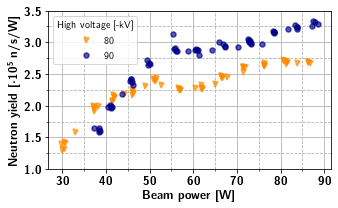

In [5]:
# -------------------------------------------------------------------
# plot measured output (n/s/W) vs beam power
# -------------------------------------------------------------------

fig = plt.figure(figsize=(8*0.60,5*0.60))

# axis 1
ax1 = fig.add_subplot(1, 1, 1)
# Hide the right and top spines
# ax1.spines['right'].set_visible(False)
# ax1.spines['top'].set_visible(False)

# take only reasonable data
df1 = df[ ((df.index >= "2017-12-21 14:03") & (df.index <= "2017-12-21 15:06"))]
df2 = df[((df.index >= "2017-12-21 15:15") & (df.index <= "2017-12-21 16:14"))]
# print(df2.head())

ax1.plot(df1['beam_power'], (df1['output'] / df1['beam_power']) / 1e5,  'v',color="darkorange", markersize=5, label='80', alpha=0.65, markeredgewidth=1.5, markeredgecolor='darkorange')
ax1.plot(df2['beam_power'], (df2['output'] / df2['beam_power']) / 1e5,  'o',color="darkblue", markersize=5, label = '90', alpha=0.65, markeredgewidth=1.5, markeredgecolor='darkblue')
plt.ylim(1.0,3.5)
# minor ticks x
minor_locator = AutoMinorLocator(2)
ax1.xaxis.set_minor_locator(minor_locator)
# minor ticks y
minor_locator = AutoMinorLocator(2)
ax1.yaxis.set_minor_locator(minor_locator)
# tick font size
ax1.tick_params('x', colors='black', labelsize=12)	
ax1.tick_params('y', colors='black', labelsize=12)	
ax1.set_ylabel(r'\textbf{Neutron yield [$\cdot 10^5$ n/s/W]}', fontsize=12)
ax1.set_xlabel(r'\textbf{Beam power [W]}', fontsize=12, labelpad=2)

# ax1.text(70, 1e7, r"Data averaged over 1 min"  "\n"  r"ca 250 rpm" "\n" r"0.4 - 1.0 mA (DF 1 - 60 \% )",  bbox={'facecolor':'white', 'alpha':0.9, 'pad':10})

ax1.grid(b=True, which='major', linestyle='-')#, color='gray')
ax1.grid(b=True, which='minor', linestyle='--')#, color='gray')
l1 = plt.legend(loc="best",  fontsize=10)
l1.set_title(r"High voltage [-kV]", prop = {'size': 10})

plt.tight_layout()
plt.savefig(f'{output_folder}neutron_yield_vs_beam_power.pdf', dpi=900)
plt.show()


# Comparison with Roberts Data
- Roberts datafiles in: /Users/hkromer/02_PhD/02_Data/07.neutron_output/data_from_Robert/


In [6]:
# output (neutrons/s)
output_data_file = '/Users/hkromer/02_PhD/02_Data/07.neutron_output/data_from_Robert/output_neutronsPerSecond.csv'
output_data = pd.read_csv(output_data_file)
# output per unit power (neutrons/s/W)
output_vs_power_file = '/Users/hkromer/02_PhD/02_Data/07.neutron_output/data_from_Robert/output_vs_power_neutronsPerSecondPerWatt.csv'
output_vs_power = pd.read_csv(output_vs_power_file)
#hv=60:5:125; % high voltage values in kV
hv = np.arange(60, 130, 5)
power = output_data / output_vs_power # beam power in W
neutron_yield_file = '/Users/hkromer/02_PhD/02_Data/07.neutron_output/data_from_Robert/output_vs_power.csv'
neutron_yield = pd.read_csv(neutron_yield_file, delimiter='\t')
neutron_yield = neutron_yield.multiply(1e5)

In [7]:
output_vs_power.head()

,3perc,6perc,9perc,12perc
0,47600,70800,80700,59700
1,59900,89300,101000,76800
2,74000,106000,107000,117000
3,84700,130000,112000,131000
4,105000,135000,123000,121000


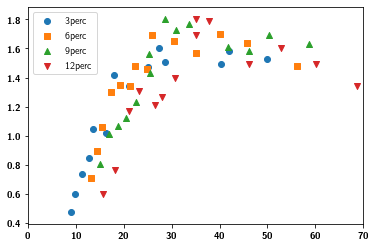

In [8]:
cols = power.columns.tolist()
markers = ['o', 's', "^", "v"]
for col, marker in zip(cols, markers):
    plt.scatter(power.loc[:,col], output_vs_power.loc[:,col]/1e5, marker=marker, label=col)

plt.xlim(0, 70)
plt.legend(loc='best')


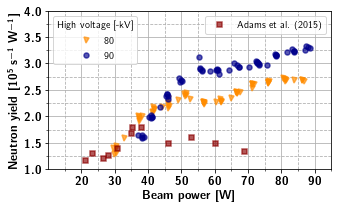

In [10]:
# -------------------------------------------------------------------
# plot measured output (n/s/W) vs beam power
# -------------------------------------------------------------------

fig = plt.figure(figsize=(8*0.60,5*0.60))

# axis 1
ax1 = fig.add_subplot(1, 1, 1)
# Hide the right and top spines
# ax1.spines['right'].set_visible(False)
# ax1.spines['top'].set_visible(False)

# take only reasonable data
df1 = df[ ((df.index >= "2017-12-21 14:03") & (df.index <= "2017-12-21 15:06"))]
df2 = df[((df.index >= "2017-12-21 15:15") & (df.index <= "2017-12-21 16:14"))]
# print(df2.head())

ax1.plot(df1['beam_power'], (df1['output'] / df1['beam_power']) / 1e5,  'v',color="darkorange", markersize=5, label='80', alpha=0.65, markeredgewidth=1.5, markeredgecolor='darkorange')
ax1.plot(df2['beam_power'], (df2['output'] / df2['beam_power']) / 1e5,  'o',color="darkblue", markersize=5, label = '90', alpha=0.65, markeredgewidth=1.5, markeredgecolor='darkblue')
plt.ylim(1.0,4.0)
plt.xlim(10,95)
ax1.xaxis.set_ticks(np.arange(20,100,10))
# minor ticks x
minor_locator = AutoMinorLocator(2)
ax1.xaxis.set_minor_locator(minor_locator)
# minor ticks y
minor_locator = AutoMinorLocator(2)
ax1.yaxis.set_minor_locator(minor_locator)
# tick font size
ax1.tick_params('x', colors='black', labelsize=12)	
ax1.tick_params('y', colors='black', labelsize=12)	
ax1.set_ylabel(r'\textbf{Neutron yield [$10^5$ s$^{-1}$ W$^{-1}$]}', fontsize=12)
ax1.set_xlabel(r'\textbf{Beam power [W]}', fontsize=12, labelpad=2)

# ax1.text(70, 1e7, r"Data averaged over 1 min"  "\n"  r"ca 250 rpm" "\n" r"0.4 - 1.0 mA (DF 1 - 60 \% )",  bbox={'facecolor':'white', 'alpha':0.9, 'pad':10})

ax1.grid(b=True, which='major', linestyle='-')#, color='gray')
ax1.grid(b=True, which='minor', linestyle='--')#, color='gray')
leg1 = plt.legend(loc="best",  fontsize=10)
leg1.set_title(r"High voltage [-kV]", prop = {'size': 10})

col = '12perc'
marker = 's'
plot_adams, = ax1.plot(power.loc[:,col], output_vs_power.loc[:,col]/1e5, color='darkred', linestyle='None', markeredgecolor='darkred', markersize=5, alpha=0.65, markeredgewidth=1.5, marker=marker)
leg2 = ax1.legend([plot_adams],['Adams et al. (2015)'], loc='upper right')
# Manually add the first legend back
ax1.add_artist(leg1)
plt.tight_layout()
plt.savefig(f'{output_folder}neutron_yield_vs_beam_power_comparison_Robert.pdf', dpi=900)
plt.show()
